<h2 align='center'> Tugas Minggu 5 Deep Learning </h2>
<br>
<hr>
<br>
Nama: Muh. Yusuf Syam
<br>
NIM: H071191044
<br>
Soal: Pelajari Arsitektur CNN modern di <a href='https://d2l.ai/chapter_convolutional-modern/index.html'> D2L.AI Chapter 7: Modern Convolutional Neural Networks - Dive into Deep Learning<a/>

In [1]:
import tensorflow as tf
from tensorflow import keras

Data yang akan digunakan: Fashion Mnist

In [2]:
(x_train, y_train), (x_test, y_test)= keras.datasets.cifar10.load_data()
x_train, x_test= x_train/255, x_test/255

class_names= ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

170508288/170498071 [==============================] - 2s 0us/step


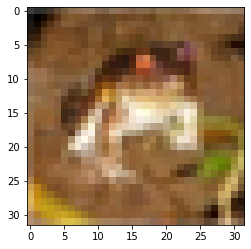

In [3]:
from matplotlib import pyplot as plt
plt.imshow(x_train[0], cmap='binary')

### Modern Convolutional Neural Networks

LeNet mempunyai performa yang baik untuk dataset yang relatif kecil, namun tidak untuk dataset yang lebih besar dan 'real' atau lebih general, untuk mengatasi masalah ini beberapa AI engineer menemukan arsitektur-arsitektur baru yang bukan hanya memiliki akurasi yang tinggi, tapi juga lebih mampu mengatasi dataset yang besar, dengan proses training yang cepat dengan penggunaan GPU. 
<br><br>
Arsitektur modern ini semuanya ditemukan setelah tahun 2012, ada 2 alasan utama dari hal tersebut:
* Kurangnya Data, dataset ImageNet berperan besar dalam mengatasi kekurangan data pada 2009
* Kurangnya kemampuan Hardware untuk pemrosesan (CPU), pada tahun 2012 Alex Krizhevsky dan Ilya Sutskever mengatasinya dengan membuat arsitektur yang bisa diproses dengan GPU (AlexNet)

Berikut beberapa arsitektur-arsitektur CNN modern:

### 1. AlexNet

AlexNet ditemukan oleh Alex Krizhevsky dan Ilya Sutskever pada tahun 2012, AlexNet merupakan pemenang dari kompetisi ImageNet Large Scale Visual Recognition Challenge 2012 dan merupakan arsitektur deep learning pertama yang berjalan pada GPU.
<br><br>
AlexNet cukup mirip dengan LeNet, bedanya AlexNet terdiri dari delapan layer: lima layer konvolusi, dua layer fcn, dan satu layer output, AlexNet juga menggunakan ReLU sebagai fungsi aktivasi. Berikut perbedaan LeNet(kiri) dengan AlexNet(kanan)

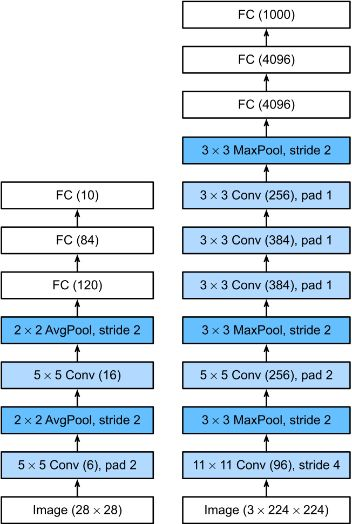

Implementasi Kode

In [4]:
alex_net= keras.models.Sequential([
        keras.layers.Conv2D(filters=96, kernel_size=11, strides=4, activation='relu', input_shape=(224,224,3)),
        keras.layers.MaxPool2D(pool_size=3, strides=2),
        keras.layers.Conv2D(filters=256, kernel_size=5, padding='same', activation='relu'),
        keras.layers.MaxPool2D(pool_size=3, strides=2),
        keras.layers.Conv2D(filters=384, kernel_size=3, padding='same', activation='relu'),
        keras.layers.Conv2D(filters=384, kernel_size=3, padding='same', activation='relu'),
        keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
        keras.layers.MaxPool2D(pool_size=3, strides=2),
        keras.layers.Flatten(),
        keras.layers.Dense(4096, activation='relu'),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(4096, activation='relu'),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(10)
    ])

Dataset cifar10 memiliki dimensi 32x32x3, sementara AlexNet membutuhkan input berdimensi 224x224x3 , jadi kita perlu melakukan reshape pada gambar terlebih dahulu
<br><br>
Karena me-resize satu-satu gambar membutuhkan waktu yang lama, maka kita dapat menggunakan API ```tf.data.Dataset``` dari tensorflow untuk menulis input pipeline

In [5]:
# Mengcasting tipe dari numpy array menjadi tensor
x_train_224= tf.data.Dataset.from_tensor_slices(x_train)

# Melakukan resize 
x_train_224= x_train_224.map(lambda img: tf.image.resize(img, tf.constant([224, 224])), num_parallel_calls=tf.data.AUTOTUNE)
# x_train_224= x_train_224.cache('/')

Karena x_train_224 merupakan generator dan ```model.fit()``` hanya mensupport generator jika generatornya merupakan pasangan x dan y, maka kita perlu memasangkan x dan y

In [6]:
# Menyatukan x dan y
train_data_224= tf.data.Dataset.zip((x_train_224, tf.data.Dataset.from_tensor_slices(y_train)))

train_data_224= train_data_224.shuffle(2)

# Caching
train_data_224= train_data_224.cache('/')

# Mendefinisikan batch
train_data_224= train_data_224.batch(64)

# Prefetch
train_data_224= train_data_224.prefetch(tf.data.experimental.AUTOTUNE)

Melakukan training, yang menjadi parameter training pengganti x dan y merupakan variabel ```train_data_224``` yang telah dibuat sebelumnya

In [ ]:
loss= keras.losses.SparseCategoricalCrossentropy(from_logits=True)
alex_net.compile(optimizer='adam', loss= loss, metrics=['accuracy'])
alex_net.fit(train_data_224, epochs= 10, batch_size= 64)

Epoch 1/10
782/782 [==============================] - 153s 179ms/step - loss: 1.8879 - accuracy: 0.3090
Epoch 2/10
782/782 [==============================] - 120s 153ms/step - loss: 1.4346 - accuracy: 0.4833
Epoch 3/10
782/782 [==============================] - 500s 640ms/step - loss: 1.2650 - accuracy: 0.5472
Epoch 4/10
782/782 [==============================] - 665s 851ms/step - loss: 1.1335 - accuracy: 0.5997
Epoch 5/10
782/782 [==============================] - 665s 851ms/step - loss: 1.0227 - accuracy: 0.6375
Epoch 6/10
782/782 [==============================] - 665s 851ms/step - loss: 0.9202 - accuracy: 0.6720
Epoch 7/10
782/782 [==============================] - 665s 851ms/step - loss: 0.8315 - accuracy: 0.7056
Epoch 8/10
782/782 [==============================] - 650s 831ms/step - loss: 0.7527 - accuracy: 0.7346
Epoch 9/10
452/782 [================>.............] - ETA: 4:41 - loss: 0.7253 - accuracy: 0.7432

In [ ]:
x_test_224= tf.data.Dataset.from_tensor_slices(x_test)
x_test_224= x_test_224.map(lambda img: tf.image.resize(img, tf.constant([224, 224])), num_parallel_calls=tf.data.AUTOTUNE)
test_data_224= tf.data.Dataset.zip((x_test_224, tf.data.Dataset.from_tensor_slices(y_test)))
test_data_224= test_data_224.batch(64)
alex_net.evaluate(test_data_224)

### 2. VGG